In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
highprice=pd.read_csv("C:\\Users\\Anjana\\Desktop\\Project DS\\2 Forecasting\\daily_high.csv")

In [3]:
highprice

,Date,High_Price
0,2016-01-01,1020.000
1,2016-01-02,1010.675
2,2016-01-03,1010.675
3,2016-01-04,1014.200
4,2016-01-05,1010.000
...,...,...
2491,2022-10-27,2468.000
2492,2022-10-28,2534.000
2493,2022-10-29,2530.500
2494,2022-10-30,2530.500


In [5]:
highprice.Date=pd.to_datetime(highprice.Date)

In [6]:
highprice.index=highprice.Date

In [7]:
highprice.drop(['Date'],axis=1,inplace=True)
highprice

,High_Price
Date,
2016-01-01,1020.000
2016-01-02,1010.675
2016-01-03,1010.675
2016-01-04,1014.200
2016-01-05,1010.000
...,...
2022-10-27,2468.000
2022-10-28,2534.000
2022-10-29,2530.500


In [8]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

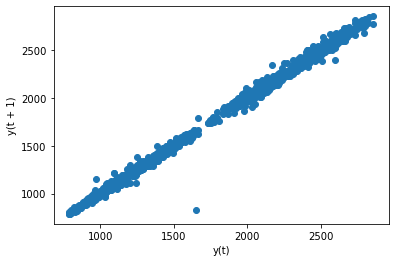

In [9]:
lag_plot(highprice.High_Price,lag=1)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

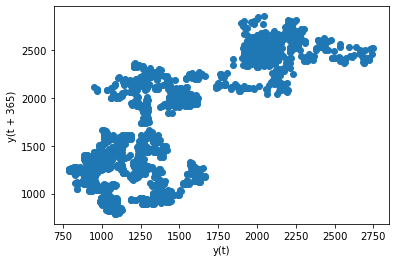

In [10]:
lag_plot(highprice.High_Price,lag=365)

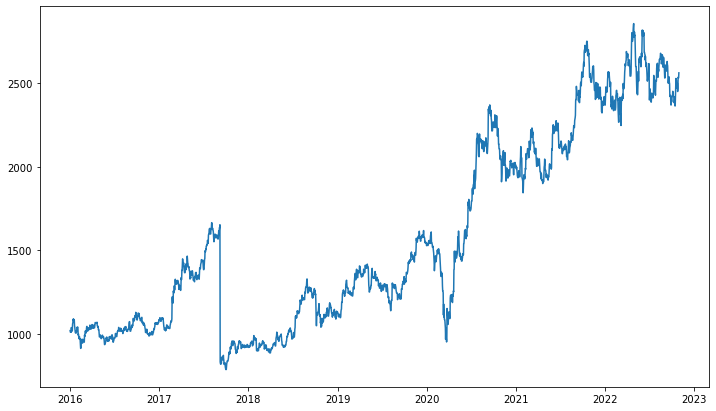

In [11]:
plt.figure(figsize=(12,7))
plt.plot(highprice.High_Price)


In [12]:
a=-365
Train=highprice.iloc[:a,:]
test=highprice.iloc[a:,:]


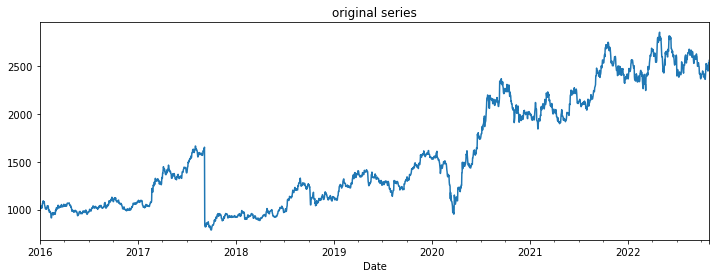

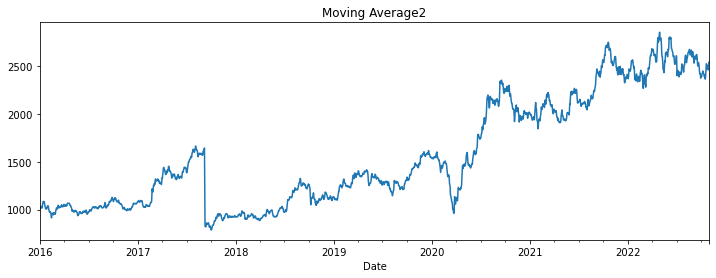

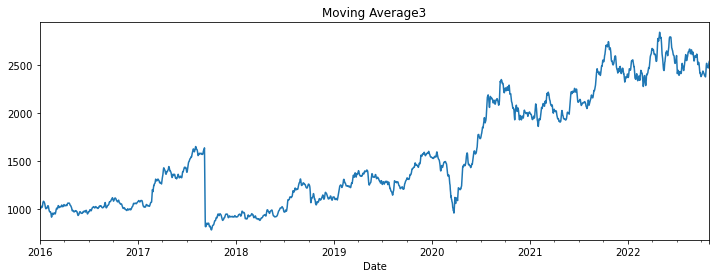

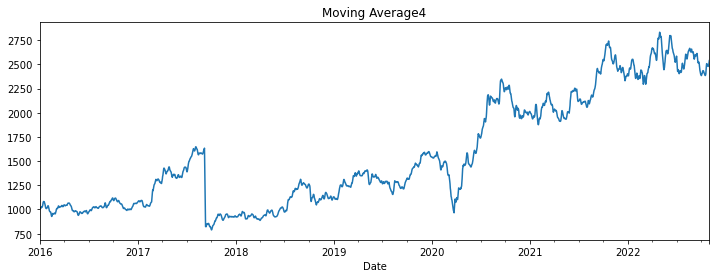

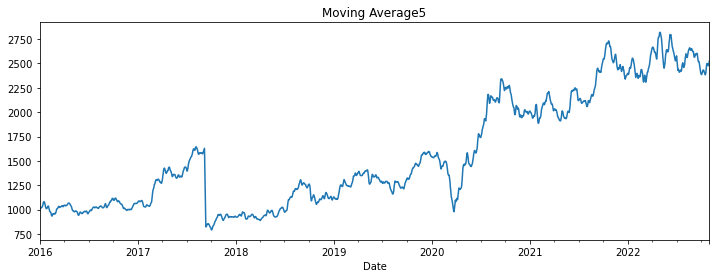

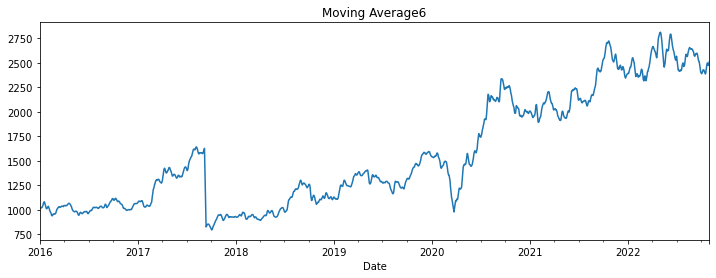

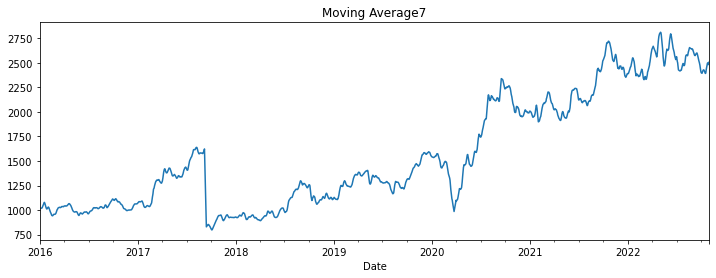

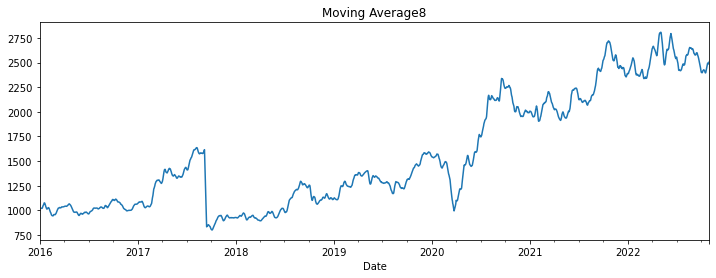

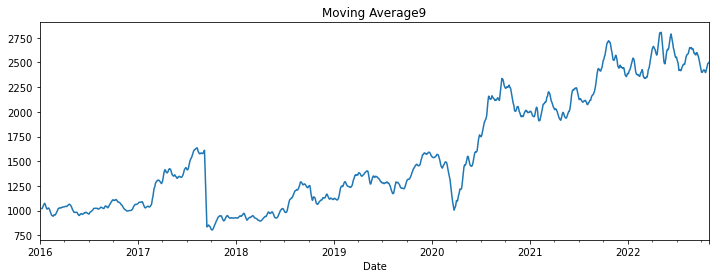

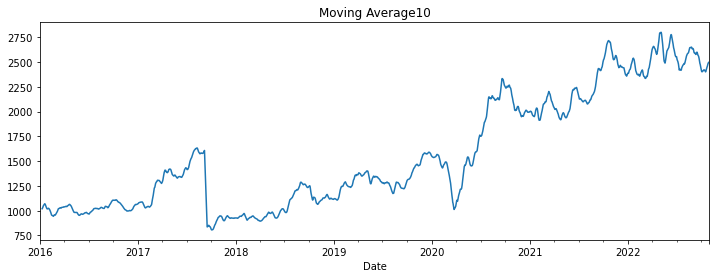

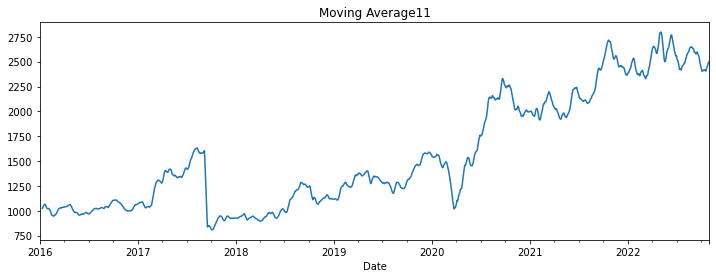

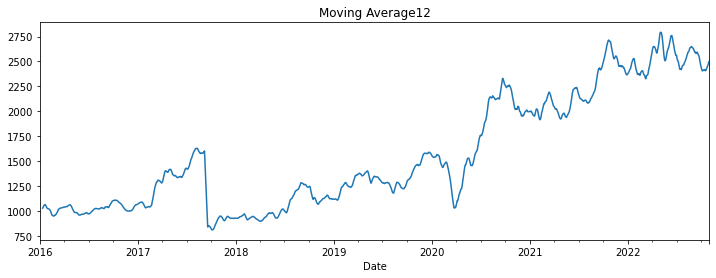

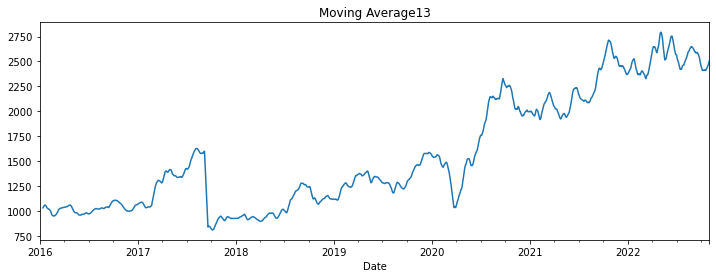

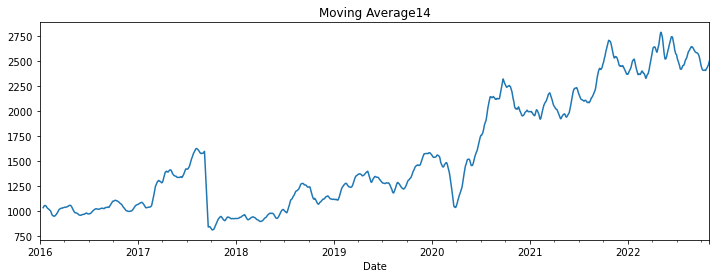

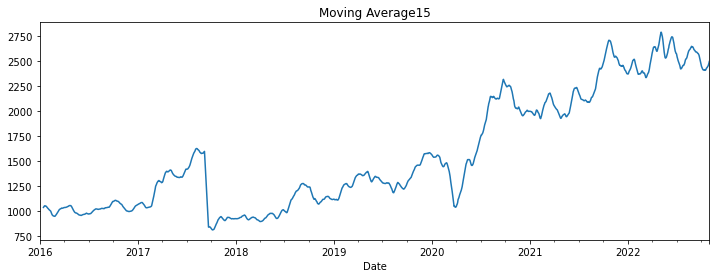

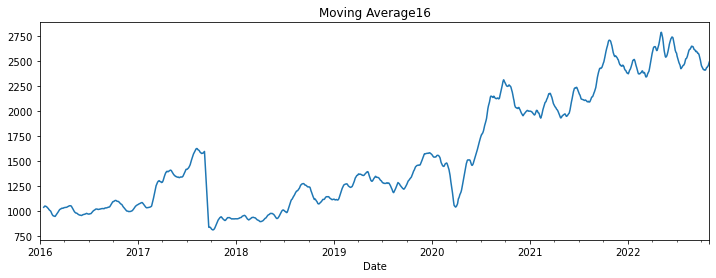

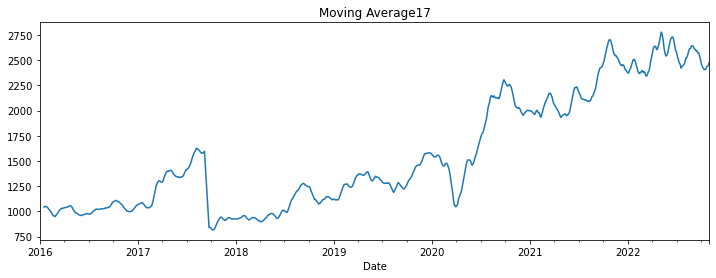

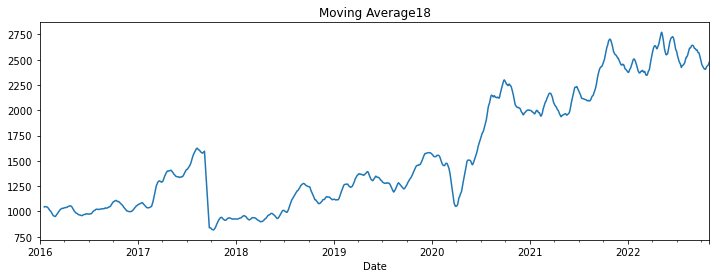

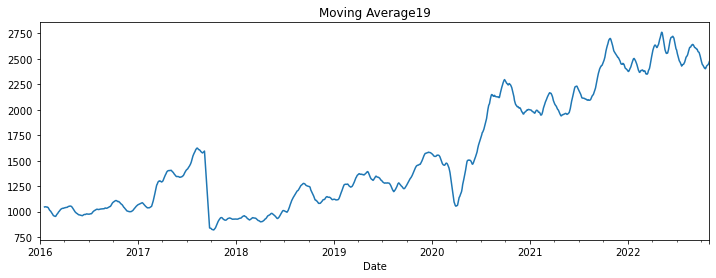

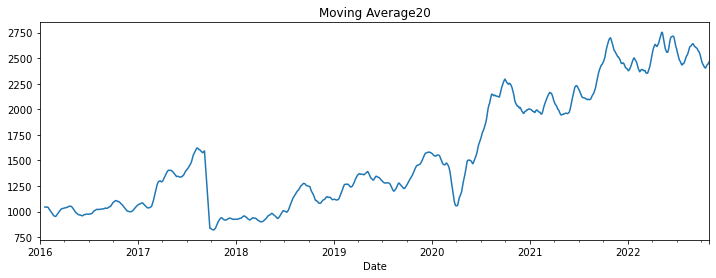

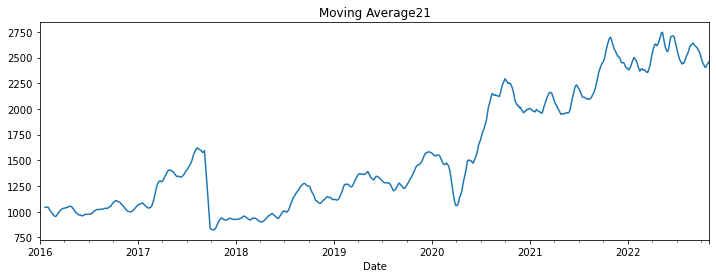

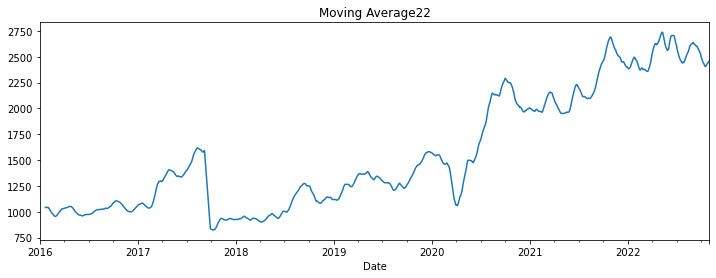

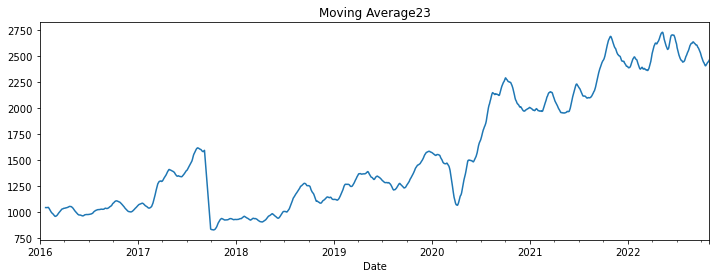

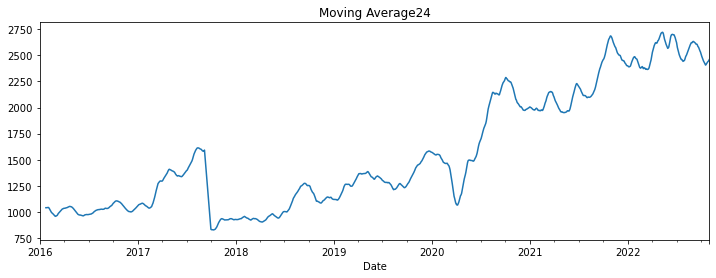

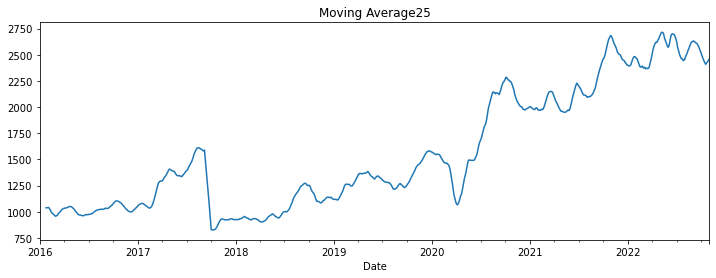

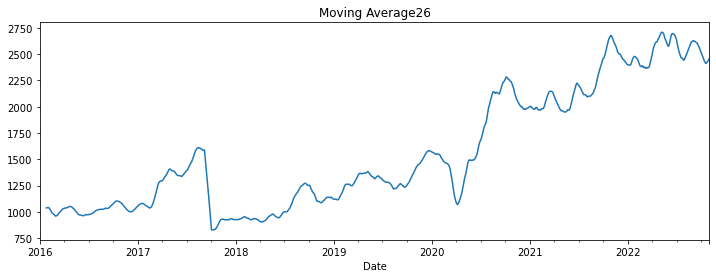

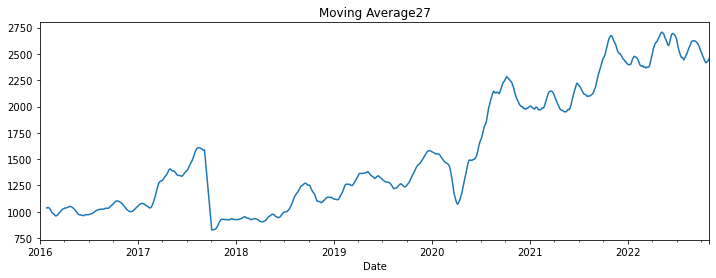

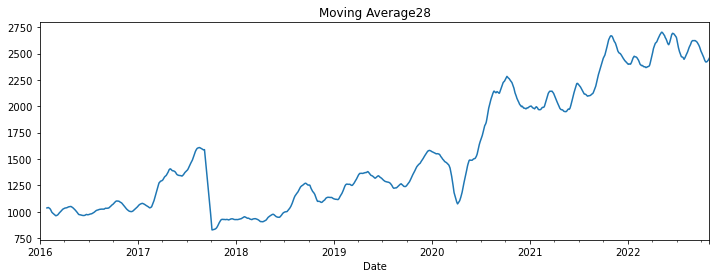

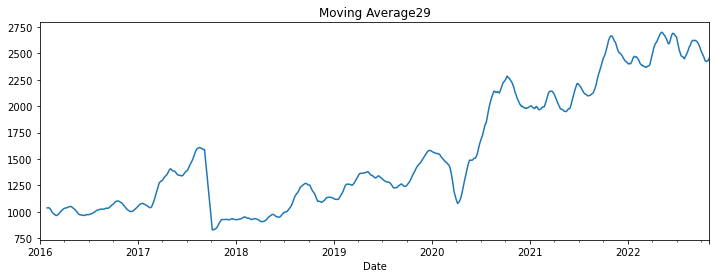

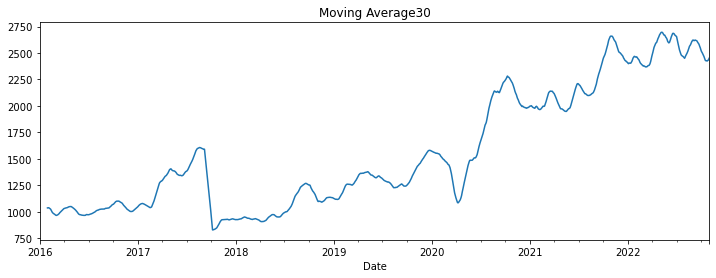

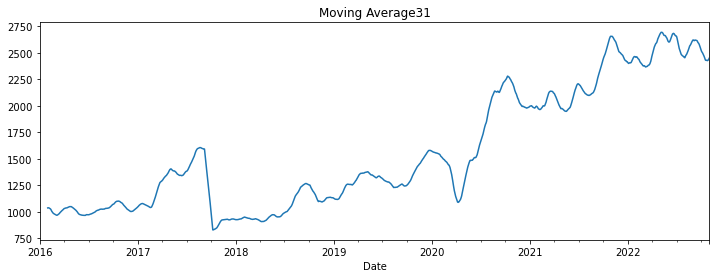

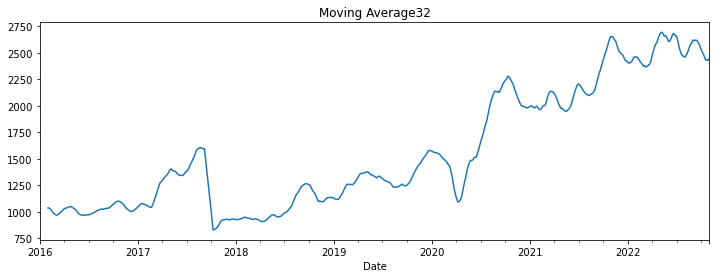

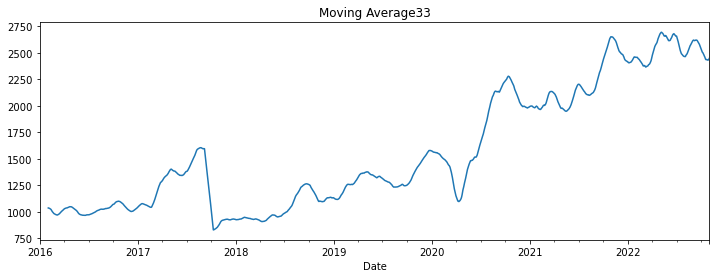

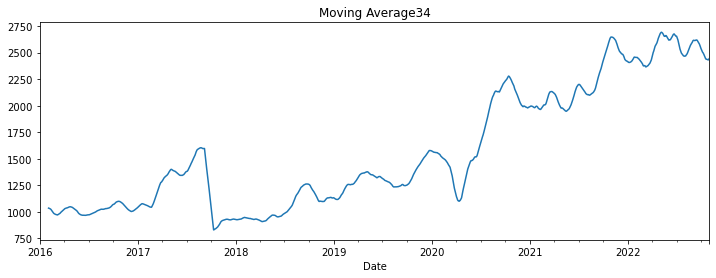

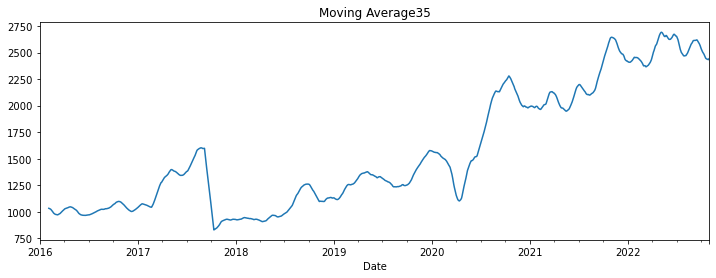

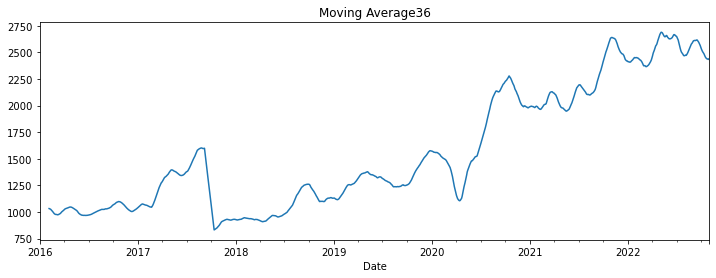

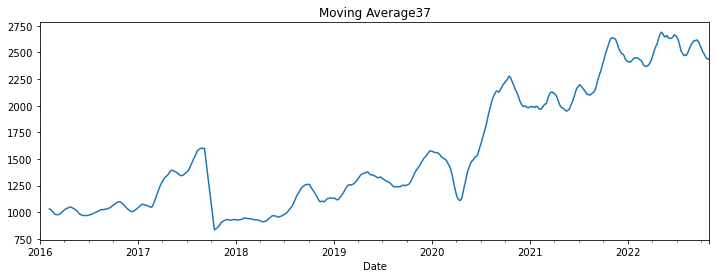

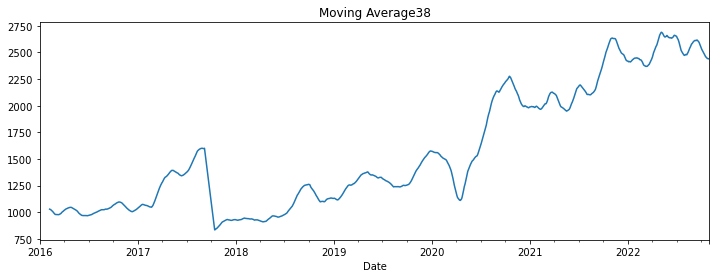

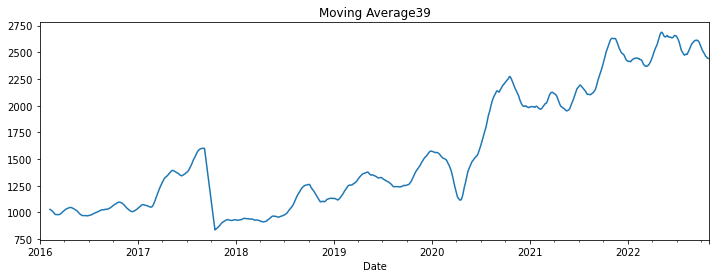

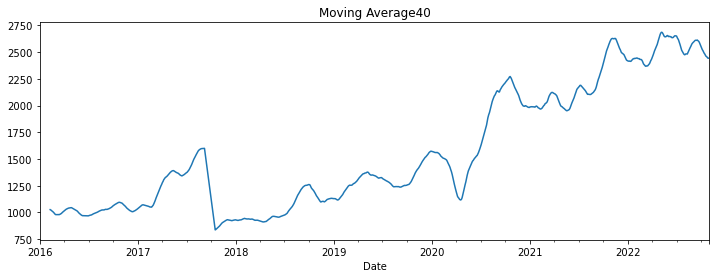

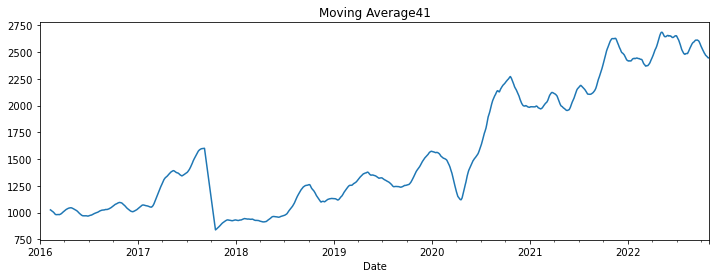

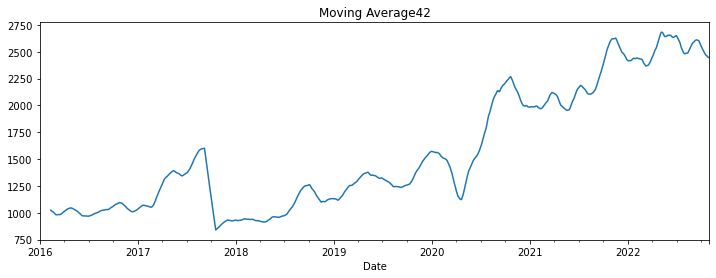

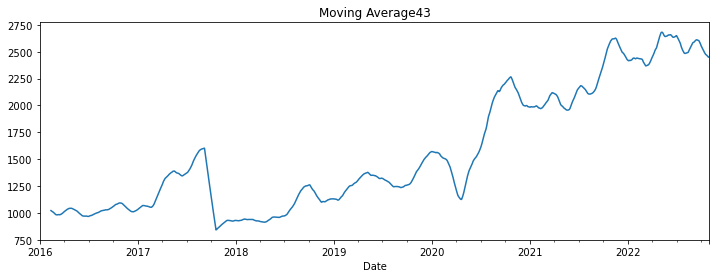

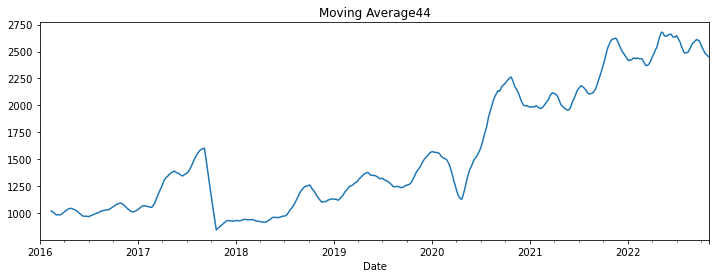

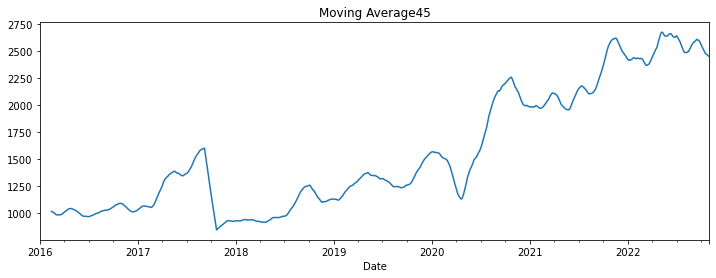

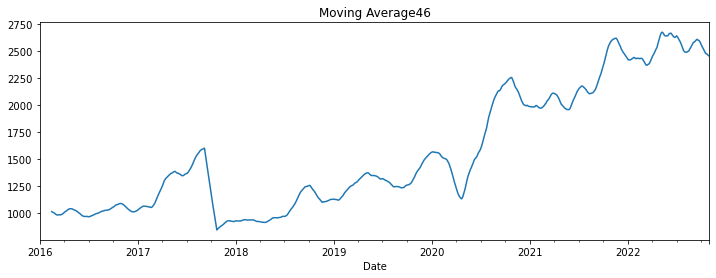

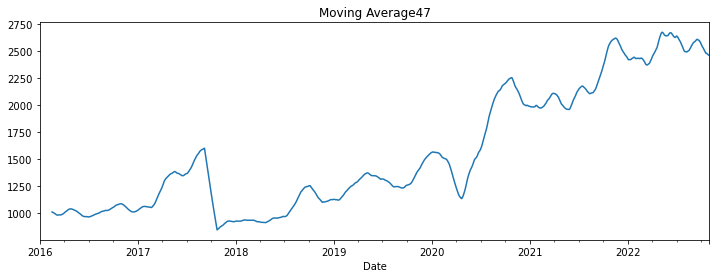

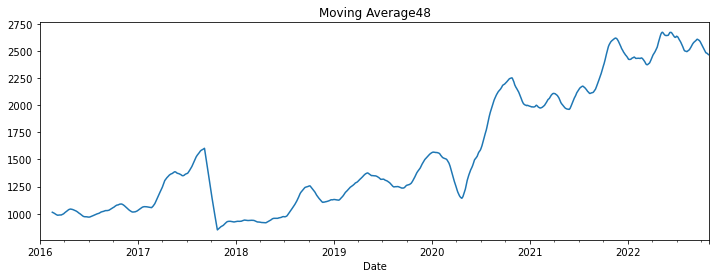

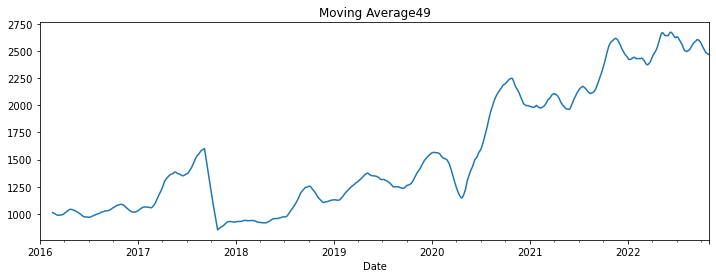

In [13]:
plt.figure(figsize=(12,4))
highprice.High_Price.plot(label='org')
plt.title('original series')


for i in range (2,50):
    plt.figure(figsize=(12,4))
    
    highprice['High_Price'].rolling(i).mean().plot(label=str(i))
    plt.title('Moving Average'+str(i))
    
    


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

In [44]:
#SimpleExpSmoothing
ses_model = SimpleExpSmoothing(Train["High_Price"]).fit(smoothing_level=1)
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_ses,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_ses,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_ses) )


MAPE:  0.04032707209077072
RMSE:  122.5876695094308
MAE:  102.20493150684932


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


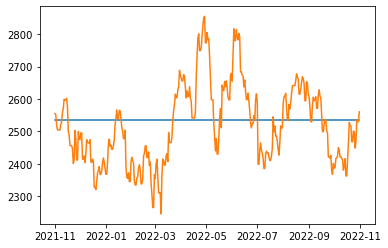

In [45]:
plt.plot(pred_ses)
plt.plot(test.High_Price)

In [18]:
from statsmodels.tsa.holtwinters import Holt

In [19]:
#Double EXponential Smoothing
hw_model = Holt(Train["High_Price"]).fit(smoothing_level=0.01, smoothing_slope=0.6)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hw,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hw,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_hw) )

MAPE:  0.039345196294248264
RMSE:  122.26774808255183
MAE:  100.33725047906927


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


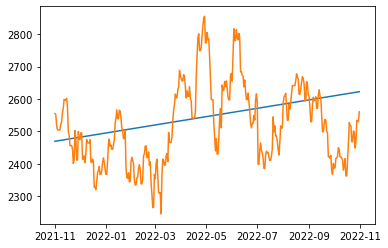

In [20]:
plt.plot(pred_hw)
plt.plot(test.High_Price)

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [22]:
#Holt Winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add=ExponentialSmoothing(Train['High_Price'],seasonal="add",trend="add",seasonal_periods=365).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_add_add,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_add_add,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_hwe_add_add) )


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE:  0.05285394180876752
RMSE:  156.560096224711
MAE:  128.46550891433802


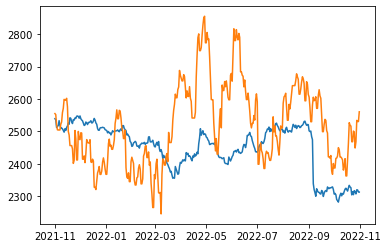

In [23]:
plt.plot(pred_hwe_add_add)
plt.plot(test.High_Price)

In [24]:
hwe_model_mul_mul=ExponentialSmoothing(Train['High_Price'],seasonal="mul",trend="mul",seasonal_periods=365).fit()
pred_hwe_mul_mul=hwe_model_mul_mul.predict(start = test.index[0],end = test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_mul_mul,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_mul_mul,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_hwe_mul_mul) )


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE:  0.3107770636326006
RMSE:  1567.8942760780178
MAE:  1319.0565577498098


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


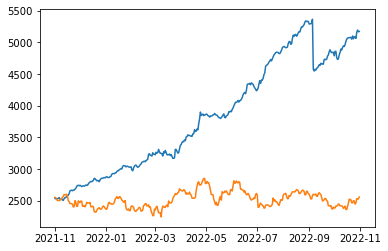

In [25]:
plt.plot(pred_hwe_mul_mul)
plt.plot(test.High_Price)

In [26]:
hwe_model_mul_add=ExponentialSmoothing(Train['High_Price'],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_mul_add,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_mul_add,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_hwe_mul_add) )


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE:  0.05971787280851231
RMSE:  201.48959398496578
MAE:  161.1788043602183


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


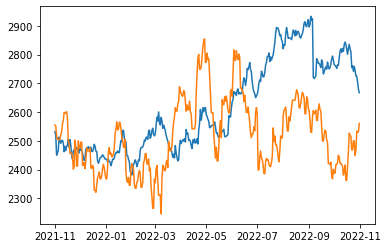

In [27]:
plt.plot(pred_hwe_mul_add)
plt.plot(test.High_Price)

In [28]:
hwe_model_mul_add1=ExponentialSmoothing(highprice["High_Price"],seasonal="mul",trend='add',seasonal_periods=365).fit()

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
pred_hwe_model_mul_add1=hwe_model_mul_add1.predict(start = highprice.index[0],end = highprice.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_model_mul_add1,highprice.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_model_mul_add1,highprice.High_Price)))
print('MAE: ',mean_absolute_error(pred_hwe_model_mul_add1,highprice.High_Price) )


MAPE:  0.011109159494845016
RMSE:  28.33271958376972
MAE:  16.792973528315294


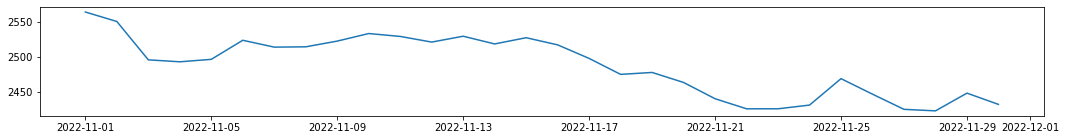

In [65]:
plt.figure(figsize=(18,2))
plt.plot(hwe_model_mul_add1.forecast(30))

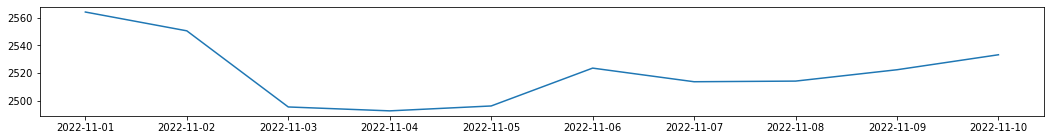

In [69]:
plt.figure(figsize=(18,2))
plt.plot(hwe_model_mul_add1.forecast(10))

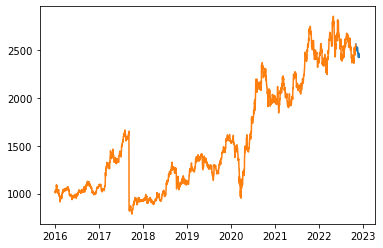

In [43]:

plt.plot(hwe_model_mul_add1.forecast(30))
plt.plot(highprice.High_Price)

In [34]:
hwe_model_add_mul=ExponentialSmoothing(Train['High_Price'],seasonal="add",trend="mul",seasonal_periods=365).fit()
pred_hwe_add_mul=hwe_model_add_mul.predict(start = test.index[0],end = test.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_add_mul,test.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_add_mul,test.High_Price)))
print('MAE: ',mean_absolute_error(test.High_Price,pred_hwe_add_mul) )


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE:  0.06273310297339252
RMSE:  196.95584149981786
MAE:  168.92462596076368


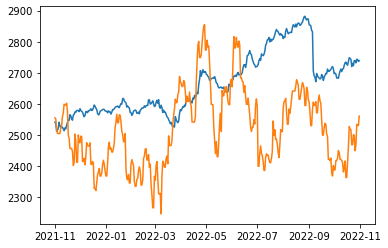

In [35]:
plt.plot(pred_hwe_add_mul)
plt.plot(test.High_Price)

In [36]:
hwe_model_add_add1=ExponentialSmoothing(highprice["High_Price"],seasonal="add",trend='add',seasonal_periods=365).fit()

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
pred_hwe_model_add_add1=hwe_model_add_add1.predict(start = highprice.index[0],end = highprice.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hwe_model_add_add1,highprice.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hwe_model_add_add1,highprice.High_Price)))
print('MAE: ',mean_absolute_error(pred_hwe_model_add_add1,highprice.High_Price) )


MAPE:  0.011333029064996121
RMSE:  28.26636764034788
MAE:  17.10702032842522


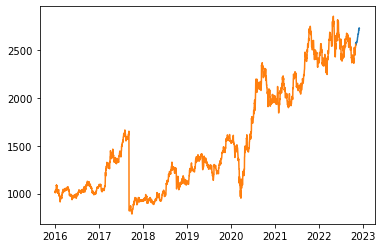

In [38]:
plt.plot(hwe_model_add_add1.forecast(30))
plt.plot(highprice.High_Price)

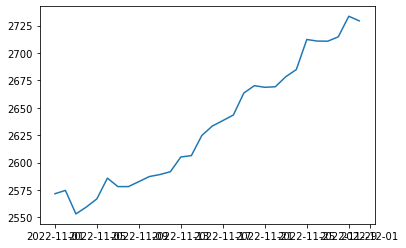

In [39]:
plt.plot(hwe_model_add_add1.forecast(30))

In [40]:
#Double EXponential Smoothing
hw_model1 = Holt(highprice["High_Price"]).fit(smoothing_level=0.01, smoothing_slope=0.6)
pred_hw1 = hw_model1.predict(start = highprice.index[0],end = highprice.index[-1])
print('MAPE: ' ,mean_absolute_percentage_error(pred_hw1,highprice.High_Price))
print('RMSE: ',np.sqrt(mean_squared_error(pred_hw1,highprice.High_Price)))
print('MAE: ',mean_absolute_error(highprice.High_Price,pred_hw1) )

MAPE:  0.13580663791582814
RMSE:  227.43693050008795
MAE:  166.95983112364698


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


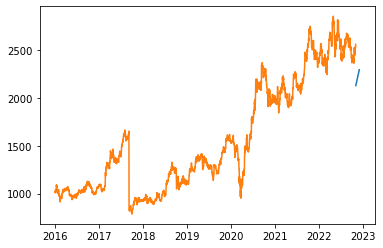

In [41]:

plt.plot(hw_model1.forecast(30))
plt.plot(highprice.High_Price)

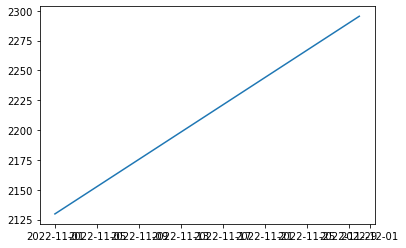

In [42]:

plt.plot(hw_model1.forecast(30))

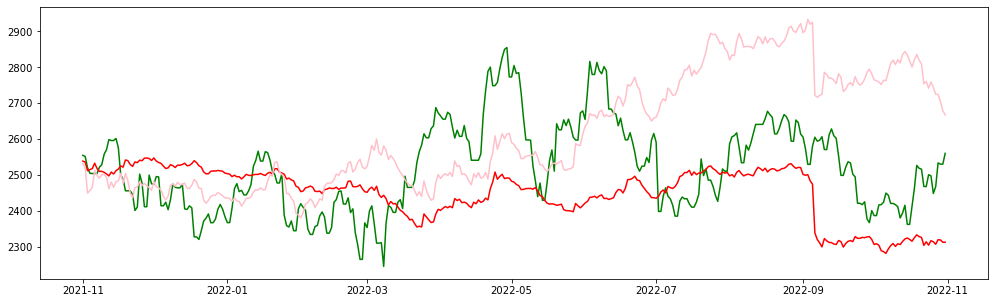

In [58]:
plt.figure(figsize=[17,5])
plt.plot(test.High_Price,color='green')
plt.plot(pred_hwe_add_add,color='red')
plt.plot(pred_hwe_mul_add,color='pink')


In [73]:
highprice.tail()

,High_Price
Date,
2022-10-27,2468.0
2022-10-28,2534.0
2022-10-29,2530.5
2022-10-30,2530.5
2022-10-31,2560.5


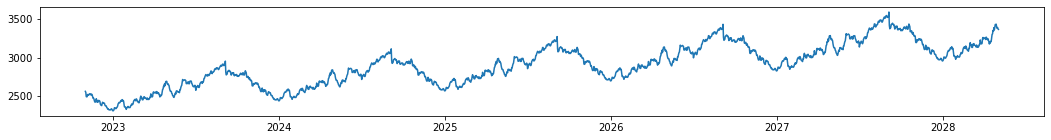

In [75]:
pred_hwe_model_mul_add1

2016-01-01    1063.198609
2016-01-02    1017.992571
2016-01-03    1009.568749
2016-01-04    1013.989834
2016-01-05    1021.757166
                 ...     
2022-10-27    2438.422782
2022-10-28    2478.973862
2022-10-29    2515.999009
2022-10-30    2513.078638
2022-10-31    2527.960639
Freq: D, Length: 2496, dtype: float64

In [76]:
hwe_model_mul_add1.resid

Date
2016-01-01   -43.198609
2016-01-02    -7.317571
2016-01-03     1.106251
2016-01-04     0.210166
2016-01-05   -11.757166
                ...    
2022-10-27    29.577218
2022-10-28    55.026138
2022-10-29    14.500991
2022-10-30    17.421362
2022-10-31    32.539361
Length: 2496, dtype: float64

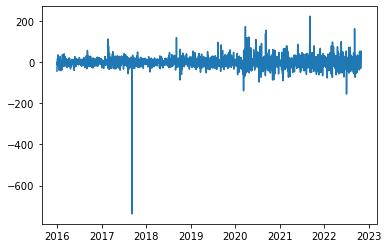

In [77]:
plt.plot(hwe_model_mul_add1.resid)

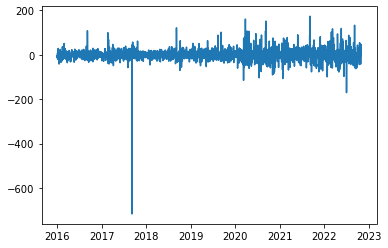

In [78]:
plt.plot(hwe_model_add_add1.resid)